In [1]:
import jax
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt

In [2]:
key = jr.PRNGKey(4)

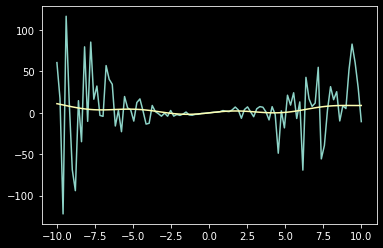

In [71]:
x = jnp.linspace(-10, 10, 100)
def f(key, x): return 2 * jnp.sin(x) + 0.75 * x **2 * jr.normal(key, x.shape) + 0.1 * x ** 2
def f_mean(x): return 2 * jnp.sin(x) + 0.1 * x ** 2


plt.plot(x, f(key, x))
plt.plot(x, f_mean(x))


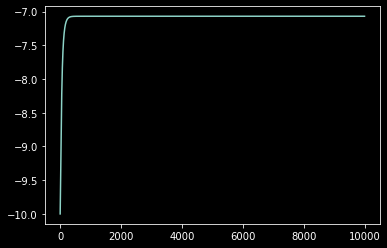

In [4]:
@jax.jit
def update(x, learning_rate):
    dx = jax.grad(f_mean)(x)
    x += - learning_rate * dx
    return x


learning_rate = 0.01
max_iter = 10000
x_gd = -10.0
iterates = [x_gd]
for _ in range(max_iter):
    x_gd = update(x_gd, learning_rate)
    iterates.append(x_gd)
iterates = jnp.array(iterates)
plt.plot(iterates)


KeyboardInterrupt: 

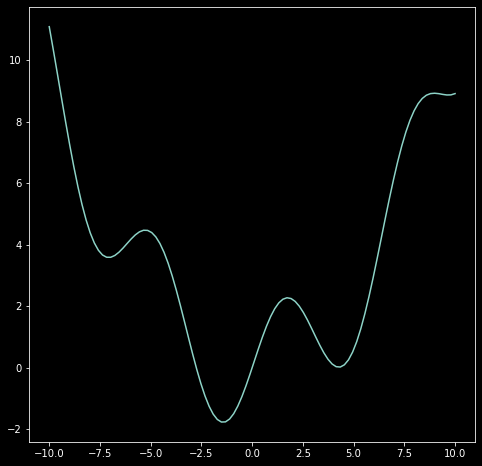

In [57]:
plt.figure(figsize=(8, 8))
plt.plot(x,f_mean(x))
plt.plot(iterates, f_mean(iterates), 'rx', markersize = 4)

In [65]:
from functools import partial


@jax.jit
@partial(jax.vmap, in_axes = (0, 0, None))
def sgd_update(key, x, learning_rate):
    dx = jax.grad(f, argnums=(1))(key, x)
    x += - learning_rate * dx
    return x


repetitions = 1000
learning_rate = 0.1
max_iter = 1000
x_gd = -10.0 * jnp.ones((repetitions, ))
iterates = [x_gd]
for _ in range(max_iter):
    keys = jr.split(key, repetitions + 1)
    key = keys[0]
    x_gd = sgd_update(keys[1:], x_gd, learning_rate)
    iterates.append(x_gd)
iterates = jnp.array(iterates)


In [36]:
keys[0]
keys[1:]

DeviceArray([[2330826875, 3319528305],
             [1905095750,  300323495],
             [1636466845, 4294583720],
             ...,
             [3663495496, 2549772124],
             [2921930501, 3493124309],
             [3814380744,  654980320]], dtype=uint32)

In [61]:
plt.figure(figsize=(15, 15))
for i in range(repetitions):
    if i % 1 == 100:
        plt.plot(iterates[:,i], alpha = 0.5)

<Figure size 1080x1080 with 0 Axes>

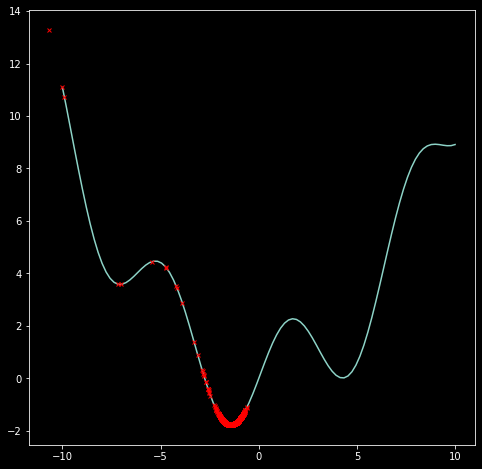

In [69]:
plt.figure(figsize=(8, 8))
plt.plot(x, f_mean(x))
plt.plot(iterates[:,41], f_mean(iterates[:,41]), 'rx', markersize=4)


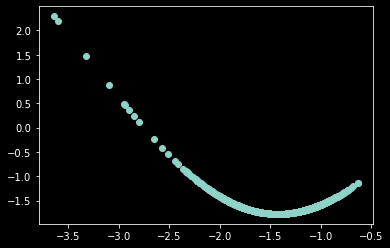

In [66]:
plt.scatter(iterates[-1,:], f_mean(iterates[-1,:]))